# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Camilo Nuñez

Identificación: 1027400583

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [2]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [ ]:
f = lambda x: np.cos(x) - x
def Ridder(f,a,b,tol = 1e-8, max_iter = 100):
#En la siguiente funcion se ingresaran variable las cuales seran
#f = a la funcion que se desea evaluar
#a,b = sera el intervalo en el que se evaluara la funcion
#tol = es la tolerancia con la cual funcionara la funcion
#max_iter = el numero maximo de iteraciones del codigo
#el codgio retornara una variable x la cual dara la raiz de la funcion segun la tolerancia y el maximo de iteraciones
# el codigo funciona con un for que va hasta max_iter + 1 en el cual cada vez que recorre la funcion evalua si el intevalo es valido
# para despues encontrar m y su respectivo valor en la funcion, de esta manera se encuentra s la cual si su valor es 0 no es posible encontrar la raiz
#por ultimo el valor que nos interesa que es x se encuentra su valor en la funcion para empezar a compararlo con la tolerancia
# si este no cumple se multiplica con los otros valores para saber cual sera el numero intervalo a trabajar retornando x
  valores_x = []
  valores_fx = []
  fa = f(a)
  fb = f(b)
  for i in range(max_iter+1):
    if fa * fb > 0:
      raise ValueError("El intervalo dado no el valido")
    m = (a+b)/2
    fm = f(m)
    s = np.sqrt((fm**2) - (fa*fb))
    if s == 0:
      return "La raiz no se puede encontrar en esta iteracion", i
    x = m + (((m-a)*fm)/s) * np.sign(fa - fb)
    valores_x.append(x)
    fx = f(x)
    valores_fx.append(fx)
    if abs(fx) < tol:
      return valores_x,valores_fx,i
    if fx * fm < 0:
      m = a
      fa = fm
      b = x
      fb = fx
    elif fa * fx < 0:
      b = x
      fb = fx
    elif fb * fx < 0:
      a = x
      fa = fx
  raise RuntimeError('Error')
x, fx, i = Ridder(f, 0,np.pi/2)
df = pd.DataFrame({"x": x, "f(x)": fx})
print(df[(df["f(x)"]<0.1)&(df["f(x)"]> -0.1)])
newton(f, 0.5)
bisect(f,0,np.pi/2)


y = np.linspace(0, np.pi/2, 200)
plt.semilogy(y, f(y), label = "Grafica $cos(x)$")
plt.semilogy(x, range(i))
plt.legend()
plt.grid()
plt.axhline(0, color = "black")
plt.show()

RuntimeError: Error

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





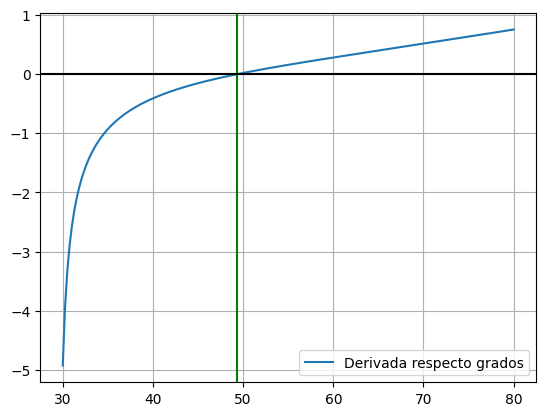

np.float64(49.346733668341706)

In [17]:
# En est aprimera funcion definicmo thetar ingresando el angulo thetai y asi hallando el angulo thetae
thetar = lambda x: np.arcsin(np.sin(x)/1.52)
#para esta segunda funcion tenemos la funcion original de la ley de snell la cual solo depende de theta i y valores constantes como n y A
delta = lambda thetai: thetai + np.arcsin(1.52 * np.sin(np.deg2rad(60) - np.arcsin(np.sin(thetai)/1.52))) - np.deg2rad
def derivadadelta(thetai):
  """La siguiente funcion tiene como entrada
  thetai = el cual es el angulo o intevalo de angulo en el cual queremos encontrar el resultado
  esta funcion retornara el valor del angulo de desviacion de la derivada de la funcion inicial de delta"""
  n = 1.52
  A = np.deg2rad(60)
  thetaR = thetar(thetai)
  arriba = np.cos(thetai) * np.cos(A-thetaR)
  abajo = np.cos(thetaR) * np.sqrt(1 - n**2 * np.sin(A-thetaR)**2)
  return 1 - arriba / abajo
#generamos un intervalo de 30 a 80 grados
thetai_grados = np.linspace(30, 80, 200)
#lo pasamos de grados a radianes ya que todo lo trabajamos en radianes
thetai = np.deg2rad(thetai_grados)
#evaluamos la funcion en el intervalo que nos interesa
valores_derivada = derivadadelta(thetai)
#buscamos entre todos los valores minimos que nos dio la funcion en el intervalo
valor_min = np.argmin(abs(valores_derivada))
#buscamos el angulo asociado al valor que se nos dio
thetai_minimo = thetai_grados[valor_min]
#el grafico y el resultado que nos da
plt.plot(thetai_grados,valores_derivada, label = "Derivada respecto grados")
plt.axvline(thetai_minimo, color = "green")
plt.grid()
plt.legend()
plt.axhline(0, color = "black")
plt.show()
thetai_minimo

In [ ]:
newton(delta,49)

In [ ]:
def angulocritico(thetai):
  """en la sigueinte funcion nuevamente solo ingresara el valor de
  thetai
  pero ahora lo que haremos es encontrar el angulo critico para el cual la igualdad se cumple
  primero evaluaremos los dos valores y los compararemos
  si son iguales retornara un 1
  si son diferentes retornara un 0
  esto es ya que lo evaluaremos en un intervalo de angulos para asi poder encontrar el angulo critico solo sera buscar en una lista de 0 y 1
  sinedo 1 un angulo critico y 0 no"""
  A = np.deg2rad(60)
  n = 1.52
  thetaR = thetar(thetai)
  valor1 = np.sin(A - thetaR)
  valor2 = 1/n
  if valor1 == valor2
    return 1
  else:
    return 0
#evaluamos la funcion anterior en el rango de angulos dado(30 - 80)
angulo_critico = angulocritico(thetai)
#buscamos los valores maximos en esa lista para saber cuales angulos son criticos
theta_critico = np.argmax(angulo_critico)
#buscamos los angulos asociados
valor_critico = thetai_grados[theta_critico]
valor_critico
#en la sigueinte funcion igualamos a 0 la ecuacion del angulo critico para hacer biseccion
f = lambda thetai: (1/1.52) - np.sin(np.deg2rad(60) - thetar(thetai))
def angulocriticobiseccion(f,a,b,tol = 1e-8,max_iter = 100):
  """primera mente ingresara
  f = la funcion que deseamos encontra
  a,b = el intervalo en el que sera evaluada
  primeramente se busca que el intervalo sea valido
  para despues iniciar con un el cual ira hasta el maximo de iteraciones permitida
  enocontrando el valor c y segun sea necesaria actualizar el valor de a o b
  retornando el valor c cuando cumpla la condicion de ser menor a la tolerancia"""
  if f(a) * f(b) > 0:
    raise ValueError("Intervalo invalido")
  for i in range(max_iter + 1)
    c = (a + b)/2
    if abs(f(c)) < tol:
      return c , i+1
    elif f(c) * f(a) < 0:
      b = c
    elif f(c) * f(a) < 0:
      a = c
  raise RuntimeError("error")